# ANN MODEL

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\UJJWAL GARG\Desktop\by\ana\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the CIFAR-10 dataset
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()
print("X_train shape:",X_train.shape)
print(X_train.shape[0],"train samples")
print(X_test.shape[0],"test samples")

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
Y_train=Y_train.reshape(-1,)
Y_train[:8]

array([6, 9, 9, 4, 1, 1, 2, 7], dtype=uint8)

In [4]:
output=["airplane","automobile","bird","deer","cat","frog","horse",
       "dog","truck","ship"]

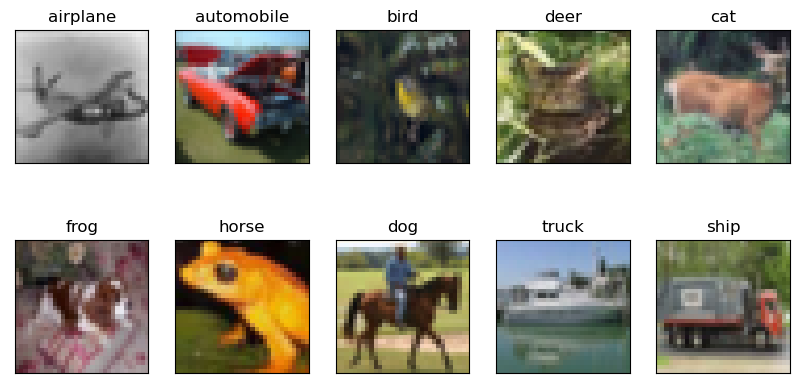

In [5]:
fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(2,5,1 + i,xticks=[],yticks=[])
    idx = np.where(Y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(output[i])
    plt.imshow(im)
plt.show()

In [6]:
#preprocess the CIFAR-10 dataset
X_train=X_train/255
X_test=X_test/255

In [7]:
# Build the ANN model
ann=models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                    layers.Dense(2700,activation="relu"),
                    layers.Dense(1200,activation="relu"),
                    layers.Dense(10,activation="sigmoid")
                                      ])

print(ann.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2700)              8297100   
                                                                 
 dense_1 (Dense)             (None, 1200)              3241200   
                                                                 
 dense_2 (Dense)             (None, 10)                12010     
                                                                 
Total params: 11550310 (44.06 MB)
Trainable params: 11550310 (44.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [8]:
# Compile the model
ann.compile(optimizer="SGD",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
# Train the model
ann.fit(X_train,Y_train,epochs=5)


Epoch 1/5


1563/1563 [==============================] - 89s 56ms/step - loss: 1.8108 - accuracy: 0.3545
Epoch 2/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.6253 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.5419 - accuracy: 0.4577
Epoch 4/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.4818 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 93s 60ms/step - loss: 1.4324 - accuracy: 0.4961


In [9]:
# Evaluate the model on the test set
ann.evaluate(X_test,Y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.4267 - accuracy: 0.4936


[1.4267152547836304, 0.4936000108718872]

In [10]:
# Evaluate the confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix,classification_report
Y_pred=ann.predict(X_test)
Y_pred_out=[np.argmax(i) for i in Y_pred]
print("classification report :",classification_report(Y_test,Y_pred_out))

313/313 [==============================] - 6s 19ms/step
classification report :               precision    recall  f1-score   support

           0       0.51      0.58      0.55      1000
           1       0.63      0.59      0.61      1000
           2       0.42      0.30      0.35      1000
           3       0.33      0.42      0.37      1000
           4       0.44      0.41      0.42      1000
           5       0.41      0.35      0.38      1000
           6       0.50      0.56      0.53      1000
           7       0.60      0.48      0.53      1000
           8       0.55      0.67      0.60      1000
           9       0.55      0.57      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



In [11]:
Y_p_l=[np.argmax(i)for i in Y_pred]
Y_p_l[:5]

[3, 9, 8, 8, 4]

In [12]:
Y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [13]:
confusion_matrix=tf.math.confusion_matrix(labels=Y_test,predictions=(Y_p_l))
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[581,  28,  37,  37,  31,  19,  21,  26, 170,  50],
       [ 44, 594,   8,  34,  11,  22,  16,  22,  87, 162],
       [113,  28, 302, 126, 133,  74, 122,  50,  37,  15],
       [ 49,  13,  62, 423,  47, 158, 108,  36,  44,  60],
       [ 84,  12, 116,  86, 408,  60, 123,  66,  33,  12],
       [ 38,  11,  71, 252,  71, 349,  83,  59,  43,  23],
       [ 13,  16,  53, 143, 109,  46, 561,  21,  19,  19],
       [ 48,  17,  48,  91,  91,  77,  44, 477,  34,  73],
       [116,  54,   8,  40,  16,  17,  11,   7, 673,  58],
       [ 45, 163,   7,  44,   4,  22,  31,  28,  88, 568]])>

Text(95.72222222222221, 0.5, 'actual')

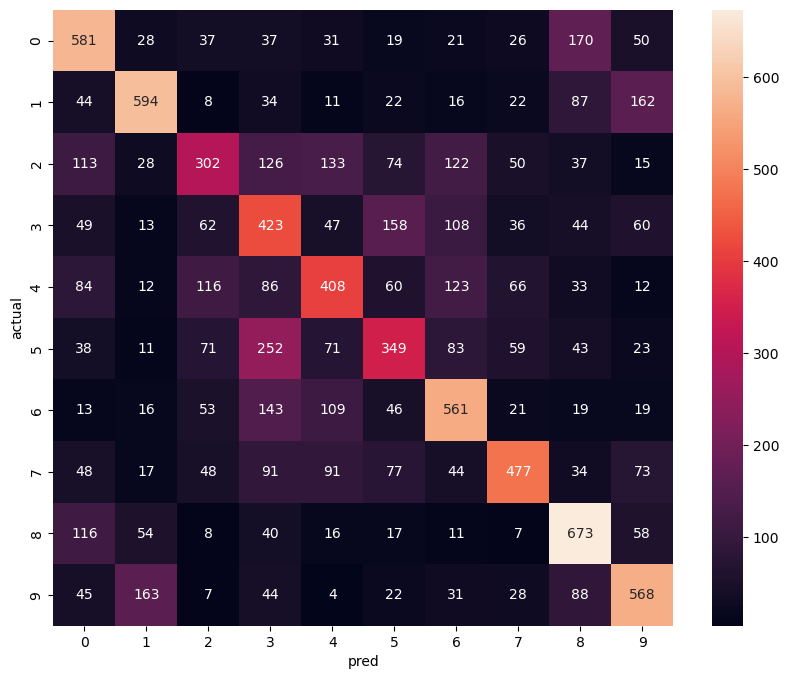

In [14]:
# plot the heat_map
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix,annot=True,fmt="d")
plt.xlabel("pred")
plt.ylabel("actual")

# CNN MODEL

In [15]:
# Build the CNN model
cnn=models.Sequential([
# Convolutional layers
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    
# Fully connected layers
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")])

print(cnn.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)              

In [16]:
# Compile the model
cnn.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

# Train the model
cnn.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 49s 26ms/step - loss: 1.4704 - accuracy: 0.4697
Epoch 2/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1341 - accuracy: 0.6020
Epoch 3/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0046 - accuracy: 0.6498
Epoch 4/5
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9221 - accuracy: 0.6794
Epoch 5/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8484 - accuracy: 0.7041


In [17]:
# Evaluate the model on the test set
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9404 - accuracy: 0.6772


[0.9403712749481201, 0.6772000193595886]

In [18]:
# Evaluate the confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix,classification_report
Y_pred=cnn.predict(X_test)
Y_pred_out=[np.argmax(i) for i in Y_pred]
print("classification report :",classification_report(Y_test,Y_pred_out))

313/313 [==============================] - 3s 8ms/step
classification report :               precision    recall  f1-score   support

           0       0.73      0.71      0.72      1000
           1       0.79      0.81      0.80      1000
           2       0.72      0.40      0.52      1000
           3       0.49      0.46      0.48      1000
           4       0.62      0.64      0.63      1000
           5       0.47      0.75      0.58      1000
           6       0.77      0.75      0.76      1000
           7       0.79      0.68      0.73      1000
           8       0.79      0.80      0.79      1000
           9       0.73      0.77      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [19]:
Y_p=[np.argmax(i)for i in Y_pred]
Y_p[:5]

[3, 8, 1, 0, 6]

In [20]:
Y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [21]:
confusion_matrix=tf.math.confusion_matrix(labels=Y_test,predictions=(Y_p))
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[714,  23,  31,  34,  24,  17,   9,   8,  96,  44],
       [ 23, 814,   2,  13,   4,  11,   5,   1,  26, 101],
       [ 79,  11, 404,  90, 108, 175,  68,  35,  15,  15],
       [ 17,  13,  32, 459,  68, 307,  49,  25,  12,  18],
       [ 21,   6,  34,  76, 639,  88,  51,  52,  24,   9],
       [ 15,   6,  15, 102,  42, 748,  19,  32,   9,  12],
       [  5,  10,  22,  85,  57,  50, 747,   6,   6,  12],
       [ 12,   6,  15,  34,  74, 146,   3, 678,   3,  29],
       [ 63,  40,   6,  19,   3,  26,   3,   4, 795,  41],
       [ 30, 105,   4,  19,   4,  14,  10,  14,  26, 774]])>

Text(95.72222222222221, 0.5, 'actual')

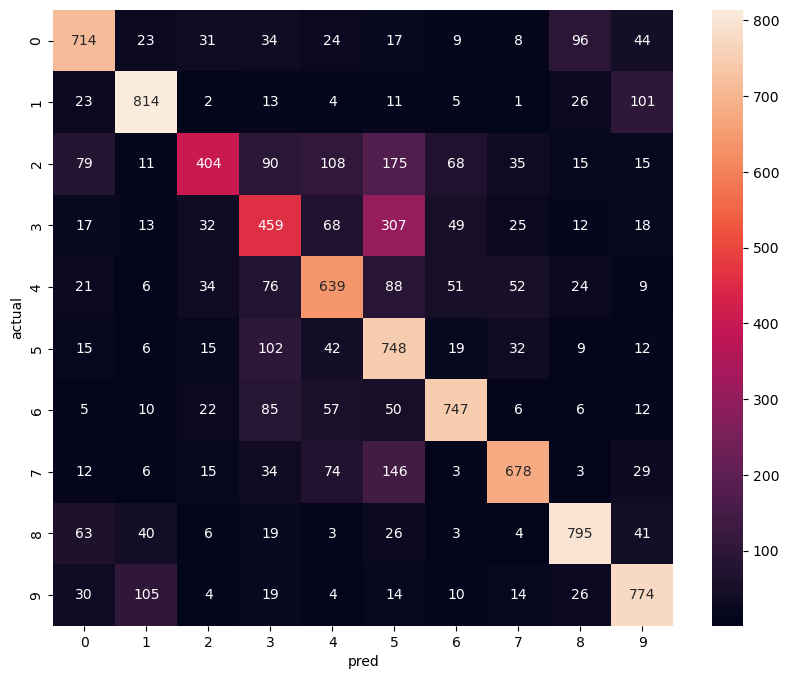

In [22]:
# plot the heat_map
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix,annot=True,fmt="d")
plt.xlabel("pred")
plt.ylabel("actual")